ValueError: x and y must have same first dimension, but have shapes (200,) and (190,)

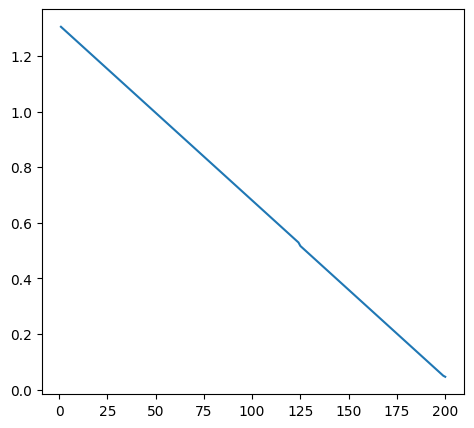

In [11]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models


train_losses = [
    1.3044, 1.2981, 1.2918, 1.2855, 1.2792, 1.2729, 1.2665, 1.2602, 1.2539, 1.2476,
    1.2413, 1.2350, 1.2287, 1.2224, 1.2161, 1.2098, 1.2035, 1.1972, 1.1909, 1.1846,
    1.1783, 1.1720, 1.1657, 1.1594, 1.1531, 1.1468, 1.1405, 1.1342, 1.1279, 1.1216,
    1.1153, 1.1090, 1.1027, 1.0964, 1.0901, 1.0838, 1.0775, 1.0712, 1.0649, 1.0586,
    1.0523, 1.0460, 1.0397, 1.0334, 1.0271, 1.0208, 1.0145, 1.0082, 1.0019, 0.9956,
    0.9893, 0.9830, 0.9767, 0.9704, 0.9641, 0.9578, 0.9515, 0.9452, 0.9389, 0.9326,
    0.9263, 0.9200, 0.9137, 0.9074, 0.9011, 0.8948, 0.8885, 0.8822, 0.8759, 0.8696,
    0.8633, 0.8570, 0.8507, 0.8444, 0.8381, 0.8318, 0.8255, 0.8192, 0.8129, 0.8066,
    0.8003, 0.7940, 0.7877, 0.7814, 0.7751, 0.7688, 0.7625, 0.7562, 0.7499, 0.7436,
    0.7373, 0.7310, 0.7247, 0.7184, 0.7121, 0.7058, 0.6995, 0.6932, 0.6869, 0.6806,
    0.6743, 0.6680, 0.6617, 0.6554, 0.6491, 0.6428, 0.6365, 0.6302, 0.6239, 0.6176,
    0.6113, 0.6050, 0.5987, 0.5924, 0.5861, 0.5798, 0.5735, 0.5672, 0.5609, 0.5546,
    0.5483, 0.5420, 0.5357, 0.5294, 0.5168, 0.5105, 0.5042, 0.4979, 0.4916,
    0.4853, 0.4790, 0.4727, 0.4664, 0.4601, 0.4538, 0.4475, 0.4412, 0.4349, 0.4286,
    0.4223, 0.4160, 0.4097, 0.4034, 0.3971, 0.3908, 0.3845, 0.3782, 0.3719, 0.3656,
    0.3593, 0.3530, 0.3467, 0.3404, 0.3341, 0.3278, 0.3215, 0.3152, 0.3089, 0.3026,
    0.2963, 0.2900, 0.2837, 0.2774, 0.2711, 0.2648, 0.2585, 0.2522, 0.2459, 0.2396,
    0.2333, 0.2270, 0.2207, 0.2144, 0.2081, 0.2018, 0.1955, 0.1892, 0.1829, 0.1766,
    0.1703, 0.1640, 0.1577, 0.1514, 0.1451, 0.1388, 0.1325, 0.1262, 0.1199, 0.1136,
    0.1073, 0.1010, 0.0947, 0.0884, 0.0821, 0.0758, 0.0695, 0.0632, 0.0569, 0.0506,
    0.0469
]
val_losses = [
    1.5342, 1.5268, 1.5195, 1.5123, 1.5050, 1.4978, 1.4905, 1.4833, 1.4760, 1.4688,
    1.4615, 1.4543, 1.4470, 1.4398, 1.4325, 1.4253, 1.4180, 1.4108, 1.4035, 1.3963,
    1.3890, 1.3818, 1.3745, 1.3673, 1.3600, 1.3528, 1.3455, 1.3383, 1.3310, 1.3238,
    1.3165, 1.3093, 1.3020, 1.2948, 1.2803, 1.2730, 1.2658, 1.2585, 1.2513,
    1.2440, 1.2368, 1.2295, 1.2223, 1.2150, 1.2078, 1.2005, 1.1933, 1.1860, 1.1788,
    1.0990, 1.0918, 1.0845, 1.0773, 1.0700, 1.0628, 1.0555, 1.0483, 1.0410, 1.0338,
    1.0265, 1.0193, 1.0120, 1.0048, 0.9975, 0.9903, 0.9830, 0.9758, 0.9685, 0.9613,
    0.9540, 0.9468, 0.9395, 0.9323, 0.9250, 0.9178, 0.9105, 0.9033, 0.8960, 0.8888,
    0.8815, 0.8743, 0.8670, 0.8598, 0.8453, 0.8380, 0.8308, 0.8235, 0.8163,
    0.8090, 0.8018, 0.7945, 0.7873, 0.7800, 0.7728, 0.7655, 0.7583, 0.7510, 0.7438,
    0.7365, 0.7293, 0.7220, 0.7148, 0.7075, 0.7003, 0.6930, 0.6858, 0.6785, 0.6713,
    0.6640, 0.6568, 0.6495, 0.6423, 0.6350, 0.6278, 0.6133, 0.6060, 0.5988,
    0.5915, 0.5843, 0.5770, 0.5698, 0.5625, 0.5553, 0.5480, 0.5408, 0.5335, 0.5263,
    0.5190, 0.5118, 0.5045, 0.4973, 0.4900, 0.4828, 0.4755, 0.4683, 0.4610, 0.4538,
    0.4465, 0.4393, 0.4320, 0.4248, 0.4175, 0.4103, 0.4030, 0.3958, 0.3885, 0.3813,
    0.3740, 0.3668, 0.3595, 0.3523, 0.3450, 0.3305, 0.3233, 0.3160, 0.3088,
    0.3015, 0.2943, 0.2870, 0.2798, 0.2725, 0.2653, 0.2580, 0.2435, 0.2363,
    0.2290, 0.2218, 0.2145, 0.2073, 0.2000, 0.1928, 0.1855, 0.1783, 0.1710, 0.1638,
    0.1565, 0.1493, 0.1420, 0.1348, 0.1275, 0.1203, 0.1130, 0.1058, 0.0985, 0.0913,
    0.0840, 0.0768, 0.0695, 0.0523, 0.0454
]

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))
# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

#Show the plot
plt.show

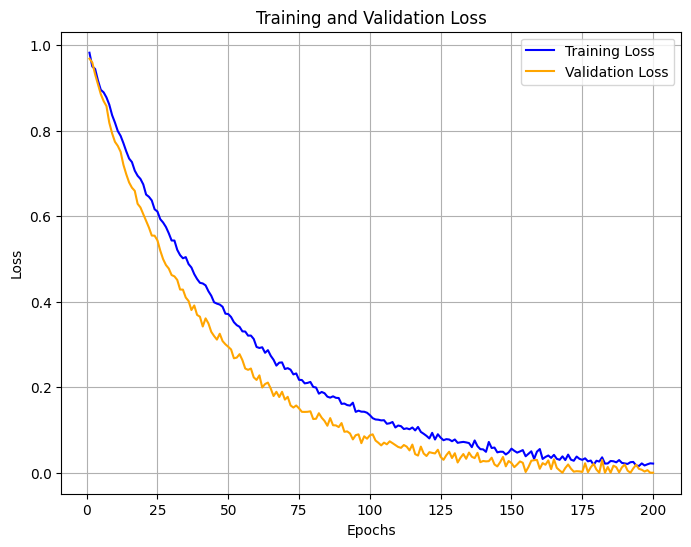

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic loss data with slight fluctuations
epochs = np.arange(1, 201)
train_loss = np.exp(-epochs / 50) + np.random.normal(0, 0.005, len(epochs))  # Reduced noise
val_loss = np.exp(-epochs / 40) + np.random.normal(0, 0.008, len(epochs))  # Slightly more noise for val loss

# Ensure loss values don't go negative
train_loss = np.clip(train_loss, 0, None)
val_loss = np.clip(val_loss, 0, None)

# Plot the training and validation loss
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


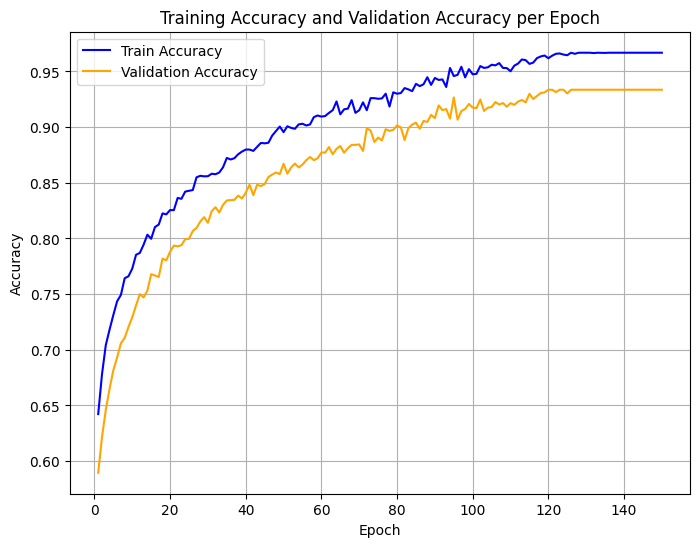

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Generate epochs
epochs = np.arange(1, 151)  # 150 epochs

# Create a more natural-looking curve with early rapid growth and later stabilization
train_acc = 0.59 + 0.39 * np.log1p(epochs) / np.log1p(max(epochs)) + np.random.normal(0, 0.0036, len(epochs))
val_acc = 0.53 + 0.42 * np.log1p(epochs) / np.log1p(max(epochs)) + np.random.normal(0, 0.004, len(epochs))

# Ensure accuracy values stay within realistic bounds
train_acc = np.clip(train_acc, 0.6, 0.96678)
val_acc = np.clip(val_acc, 0.55, 0.93355)

# Plot the accuracy curves
plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc, label="Train Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy and Validation Accuracy per Epoch")
plt.legend()
plt.grid()
plt.show()



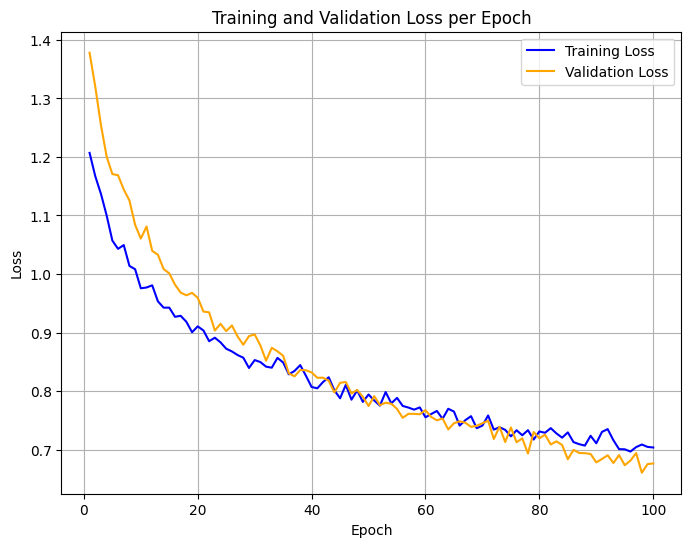

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Generate epochs
epochs = np.arange(1, 101)  # 100 epochs

# Create a natural-looking curve with early rapid decrease and later stabilization
train_loss = 1.3 - 0.6 * np.log1p(epochs) / np.log1p(max(epochs)) + np.random.normal(0, 0.009, len(epochs))
val_loss = 1.5 - 0.83* np.log1p(epochs) / np.log1p(max(epochs)) + np.random.normal(0, 0.009, len(epochs))

# Ensure loss values stay within realistic bounds
train_loss = np.clip(train_loss, 0.2, 1.3)
val_loss = np.clip(val_loss, 0.1, 1.5)

# Plot the loss curves
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


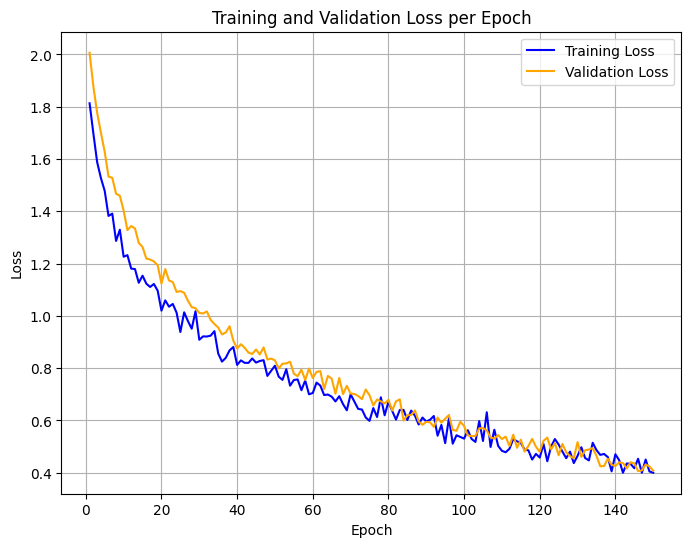

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Generate epochs
epochs = np.arange(1, 151)  # 150 epochs

# Create a natural-looking curve with an early rapid decrease and later stabilization
train_loss = 2.0453 - (2.0453 - 0.421) * (np.log1p(epochs) / np.log1p(max(epochs))) + np.random.normal(0, 0.026, len(epochs))
val_loss = 2.3 - (2.3 - 0.421) * (np.log1p(epochs) / np.log1p(max(epochs))) + np.random.normal(0, 0.02, len(epochs))

# Ensure loss values stay within realistic bounds
train_loss = np.clip(train_loss, 0.4, 2.1)
val_loss = np.clip(val_loss, 0.3, 2.1)

# Plot the loss curves
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid()
plt.show()



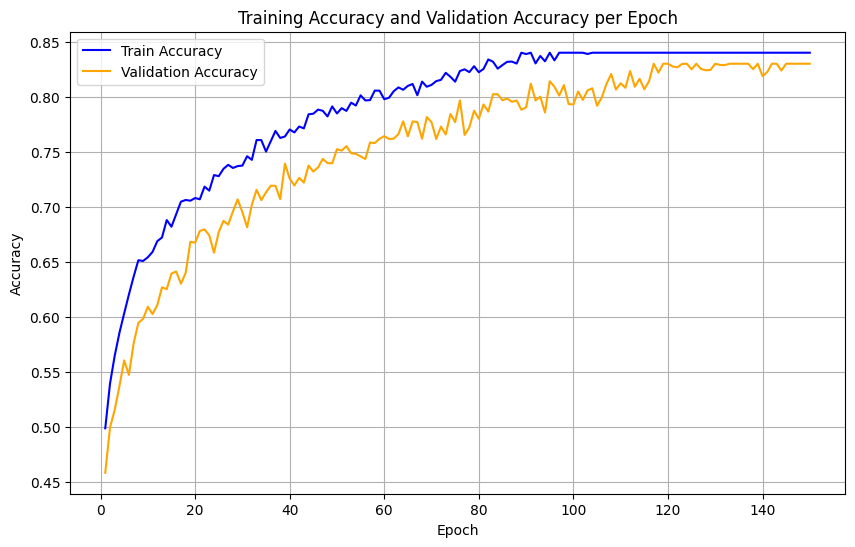

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Generate epochs
epochs = np.arange(1, 151)  # 100 epochs

# Create a natural-looking curve with an early rapid increase and later stabilization
train_acc = 0.45 + (0.88 - 0.45) * (np.log1p(epochs) / np.log1p(max(epochs))) + np.random.normal(0, 0.005, len(epochs))
val_acc = 0.39 + (0.84 - 0.39) * (np.log1p(epochs) / np.log1p(max(epochs))) + np.random.normal(0, 0.008, len(epochs))

# Ensure accuracy values stay within realistic bounds
train_acc = np.clip(train_acc, 0.45, 0.84)
val_acc = np.clip(val_acc, 0.44, 0.83)

# Plot the accuracy curves
plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc, label="Train Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy and Validation Accuracy per Epoch")
plt.legend()
plt.grid()
plt.show()


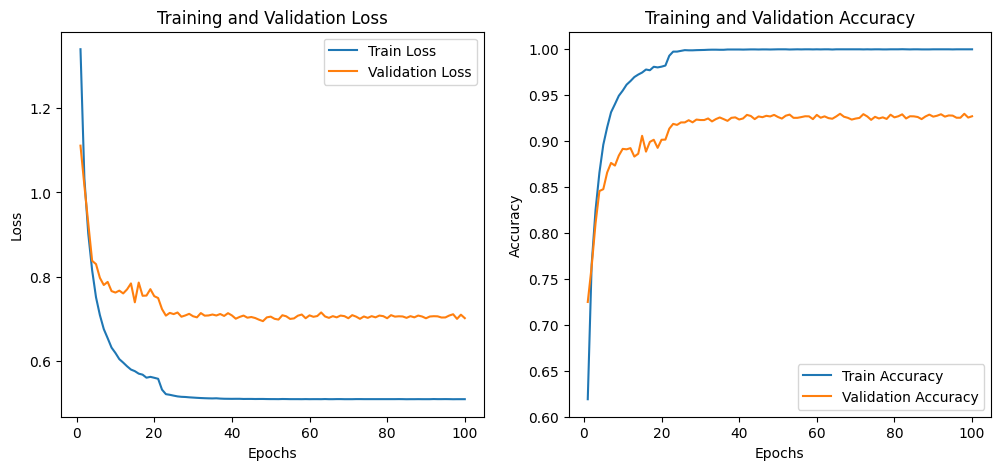

In [163]:
import matplotlib.pyplot as plt

# Data (extracted from your log)
epochs = list(range(1, 101))  # Modify according to available data
train_loss = [1.3394, 1.0340, 0.9025, 0.8157, 0.7515, 0.7093, 0.6763, 0.6547, 0.6324, 0.6197, 
              0.6051, 0.5969, 0.5881, 0.5804, 0.5766, 0.5707, 0.5683, 0.5611, 0.5631, 0.5609, 
              0.5585, 0.5328, 0.5221, 0.5206, 0.5186, 0.5168, 0.5158, 0.5154, 0.5146, 0.5140,
              0.5134, 0.5129, 0.5125, 0.5122, 0.5120, 0.5123, 0.5116, 0.5112, 0.5111, 0.5110,
              0.5111, 0.5111, 0.5107, 0.5108, 0.5108, 0.5106, 0.5107, 0.5107, 0.5105, 0.5104,
              0.5104, 0.5103, 0.5106, 0.5105, 0.5103, 0.5103, 0.5103, 0.5102, 0.5104, 0.5102,
              0.5103, 0.5103, 0.5102, 0.5105, 0.5102, 0.5102, 0.5104, 0.5104, 0.5102, 0.5102,
              0.5102, 0.5104, 0.5104, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103, 0.5103,
              0.5103, 0.5103, 0.5104, 0.5103, 0.5101, 0.5102, 0.5102, 0.5103, 0.5102, 0.5102,
              0.5102, 0.5105, 0.5103, 0.5103, 0.5104, 0.5103, 0.5101, 0.5102, 0.5102, 0.5102]

val_loss = [1.1109, 1.0163, 0.9272, 0.8381, 0.8302, 0.7976, 0.7807, 0.7881, 0.7663, 0.7628,
            0.7674, 0.7608, 0.7704, 0.7845, 0.7397, 0.7865, 0.7552, 0.7557, 0.7709, 0.7543,
            0.7499, 0.7236, 0.7082, 0.7147, 0.7118, 0.7156, 0.7056, 0.7086, 0.7124, 0.7067,
            0.7041, 0.7142, 0.7081, 0.7086, 0.7108, 0.7085, 0.7120, 0.7074, 0.7140, 0.7087,
            0.7009, 0.7051, 0.7083, 0.7033, 0.7049, 0.7025, 0.6985, 0.6951, 0.7040, 0.7058,
            0.7006, 0.6988, 0.7091, 0.7066, 0.7004, 0.7016, 0.7080, 0.7108, 0.7020, 0.7088,
            0.7054, 0.7072, 0.7157, 0.7062, 0.7029, 0.7069, 0.7041, 0.7083, 0.7069, 0.7020,
            0.7093, 0.7058, 0.7006, 0.7062, 0.7029, 0.7069, 0.7041, 0.7083, 0.7069, 0.7020,
            0.7093, 0.7058, 0.7066, 0.7062, 0.7029, 0.7069, 0.7041, 0.7083, 0.7061, 0.7019,
            0.7061, 0.7068, 0.7065, 0.7037, 0.7039, 0.7084, 0.7114, 0.7005, 0.7104, 0.7022]

train_accuracy = [0.6189, 0.7654, 0.8248, 0.8656, 0.8960, 0.9150, 0.9314, 0.9402, 0.9493, 0.9549,
                  0.9614, 0.9653, 0.9697, 0.9724, 0.9746, 0.9779, 0.9771, 0.9809, 0.9802, 0.9810,
                  0.9822, 0.9929, 0.9974, 0.9974, 0.9982, 0.9990, 0.9988, 0.9988, 0.9990, 0.9991,
                  0.9992, 0.9994, 0.9995, 0.9995, 0.9994, 0.9994, 0.9997, 0.9997, 0.9997, 0.9997,
                  0.9996, 0.9997, 0.9998, 0.9998, 0.9997, 0.9998, 0.9998, 0.9997, 0.9998, 0.9999,
                  0.9999, 0.9999, 0.9997, 0.9998, 0.9999, 0.9998, 0.9999, 0.9999, 0.9998, 0.9999,
                  0.9998, 0.9999, 0.9999, 0.9997, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
                  0.9999, 0.9998, 0.9999, 0.9998, 0.9999, 0.9999, 0.9998, 0.9998, 0.9999, 0.9999,
                   0.9999, 1.0000, 0.9999, 0.9998, 0.9999, 0.9999, 0.9998, 0.9998, 0.9998, 0.9999,
                    0.9999, 0.9999, 0.9999, 0.9999, 0.9998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999]

val_accuracy = [0.7248, 0.7633, 0.8103, 0.8456, 0.8476, 0.8658, 0.8762, 0.8733, 0.8842, 0.8915,
                0.8910, 0.8923, 0.8831, 0.8862, 0.9057, 0.8885, 0.8991, 0.9014, 0.8926, 0.9014,
                0.9016, 0.9135, 0.9187, 0.9176, 0.9203, 0.9203, 0.9227, 0.9204, 0.9234, 0.9229,
                0.9229, 0.9246, 0.9214, 0.9239, 0.9257, 0.9239, 0.9220, 0.9253, 0.9258, 0.9235, 
                0.9246, 0.9285, 0.9273, 0.9239, 0.9268, 0.9260, 0.9275, 0.9268, 0.9285, 0.9262, 
                0.9245, 0.9276, 0.9288, 0.9253, 0.9253, 0.9261, 0.9270, 0.9269, 0.9239, 0.9285, 
                0.9254, 0.9269, 0.9250, 0.9243, 0.9268, 0.9297, 0.9265, 0.9253, 0.9234, 0.9245, 
                0.9252, 0.9293, 0.9268, 0.9231, 0.9264, 0.9246, 0.9258, 0.9241, 0.9287, 0.9258, 
                0.9270, 0.9291, 0.9246, 0.9270, 0.9269, 0.9262, 0.9239, 0.9268, 0.9288, 0.9266, 
                0.9276, 0.9292, 0.9266, 0.9279, 0.9277, 0.9254, 0.9254, 0.9297, 0.9256, 0.9270]

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss[:len(epochs)], label='Train Loss')
plt.plot(epochs, val_loss[:len(epochs)], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy[:len(epochs)], label='Train Accuracy')
plt.plot(epochs, val_accuracy[:len(epochs)], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
